In [125]:
using LinearAlgebra
using Plots
using Random
using Distributions
using Arpack
rng = MersenneTwister(1234);

Functions to compute magnetic Laplacian and eigenmaps

In [179]:
function norm_mag_lap(W,g)
    n = size(W,1)
    W_s = 0.5*(W + W')
    d = W_s*ones(n)
    N = diagm(1 ./ sqrt.(d))
    A = (W - W')
    T = exp.(2 * pi * im * g * A)
    L =  N * (diagm(d) - W_s .* T) * N
    return L
end

function norm_mag_eig_maps(W,g)

    # normalized magnetic Laplacian
    L = norm_mag_lap(W,g)

    # compute the 6 smallest eigenvectors
    lambda, V = eigs(L; nev=6, which=:SM)
    # keep the 2 eigenvectors with smallest eigenvalues
    v0 = V[:, 1]
    v1 = V[:,2]

    x = angle.(v0)
    y = angle.(v1)

    # irrelevant phase shift 
    #(since each eigenvector is defined up to a global comlex phase)
    x = x .- mean(x)
    y = y .- mean(y)
    return x,y
end

norm_mag_eig_maps (generic function with 1 method)

Artificial network similar to Fig 3

In [194]:
# Example inspired by reference [20] Community structure in directed networks E.A. Leicht and M.E.J. Newman
# Phys. Rev. Lett., 100 (2008),

n_com = 14
n_extra = 2
n = 2 * n_com + 2 * n_extra 
W = zeros(n,n)
G1 = 1:n_com
G2 = (n_com + 1):(2*n_com)
G3 = (2*n_com + 1):(2*n_com + n_extra)
G4 = (2*n_com + n_extra + 1):((2*n_com + 2*n_extra))

p_in = 0.9
p_out = 0.1
p_ext = 0.9
for i = 1:n
    for j = 1:n
        if i != j
            if ((i in G1) & (j in G1)) || ((i in G2) & (j in G2))
                if rand(rng) < p_in
                    # then directed link
                    if rand(rng) < 0.5
                        W[i,j] = 1
                    else
                        W[j,i] = 1
                    end
                end
            elseif ((i in G1) & (j in G2)) || ((i in G2) & (j in G1))
                if rand(rng) < p_out
                    # then directed link
                    if rand(rng) < 0.5
                        W[i,j] = 1
                    else
                        W[j,i] = 1
                    end
                end
            elseif i in G3
                if rand(rng) < p_ext
                    W[i,j] = 1
                end
            elseif i in G4
                if rand(rng) < p_ext
                    W[j,i] = 1
                end
            end
        end           
    end
end


Similar embedding as in Fig.3 (b)

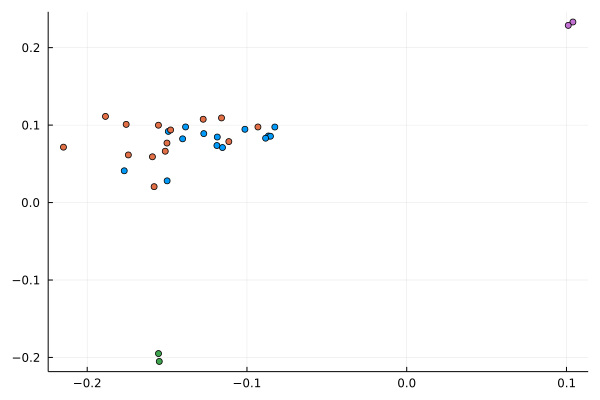

In [198]:
# normalized magnetic Laplacian
L = norm_mag_lap(W,g)
# compute the 6 smallest eigenvectors
lambda, V = eigs(L; nev=6, which=:SM)
# keep the 2 eigenvectors with smallest eigenvalues
v0 = V[:, 1]

x = real.(v0)
y = imag.(v0)

# plotting the groups in different color
plot(x[G1],y[G1], seriestype=:scatter,legend=false)
plot!(x[G2],y[G2], seriestype=:scatter,legend=false)
plot!(x[G3],y[G3], seriestype=:scatter,legend=false)
plot!(x[G4],y[G4], seriestype=:scatter,legend=false)

Similar embedding as in Fig.3 (c)

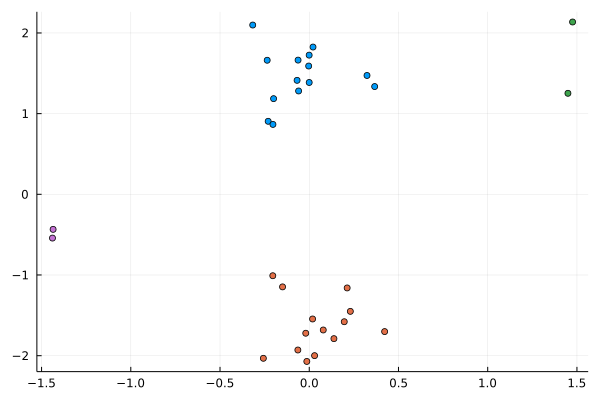

In [201]:
x,y = norm_mag_eig_maps(W,g)

# plotting the groups in different color
plot(x[G1],y[G1], seriestype=:scatter,legend=false)
plot!(x[G2],y[G2], seriestype=:scatter,legend=false)
plot!(x[G3],y[G3], seriestype=:scatter,legend=false)
plot!(x[G4],y[G4], seriestype=:scatter,legend=false)

Artificial network similar to Fig 2

In [209]:
n_com = 30
n = 3 * n_com

G1 = 1:n_com
G2 = (n_com + 1):(2*n_com)
G3 = (2*n_com + 1):(n)
W = zeros(n,n)

p_in = 0.5
p_ext = 0.9

for i = 1:n
    for j = 1:n
        if i != j
            # i and j are in the same group
            if ((i in G1) & (j in G1)) || ((i in G2) & (j in G2)) || ((i in G3) & (j in G3))
                if rand(rng) < p_in
                    # add a link
                    if rand(rng) < 0.5
                        W[i,j] = 1
                    else
                        W[j,i] = 1
                    end
                end
            elseif rand(rng) < 0.5 # connection to another group
                if ((i in G1) & (j in G2)) || ((i in G2) & (j in G3)) || ((i in G3) & (j in G1))
                    if rand(rng) < p_ext
                        # add a link from (G1 to G2) or (G2 to G3) or (G3 to G1)
                        W[i,j] = 1
                    else
                        W[j,i] = 1
                    end
                end
            end                
        end
    end
end

Similar embedding as in Fig.2 (b)

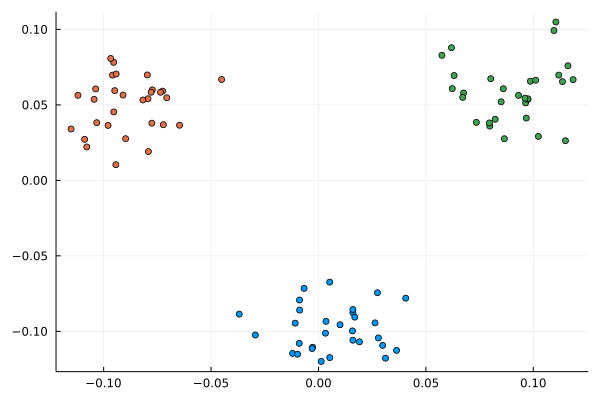

In [210]:
# normalized magnetic Laplacian
L = norm_mag_lap(W,g)
# compute the 6 smallest eigenvectors
lambda, V = eigs(L; nev=6, which=:SM)
# keep the 2 eigenvectors with smallest eigenvalues
v0 = V[:, 1]

x = real.(v0)
y = imag.(v0)

# plotting the groups in different color
plot(x[G1],y[G1], seriestype=:scatter,legend=false)
plot!(x[G2],y[G2], seriestype=:scatter,legend=false)
plot!(x[G3],y[G3], seriestype=:scatter,legend=false)

Similar embedding as in Fig.2 (c)

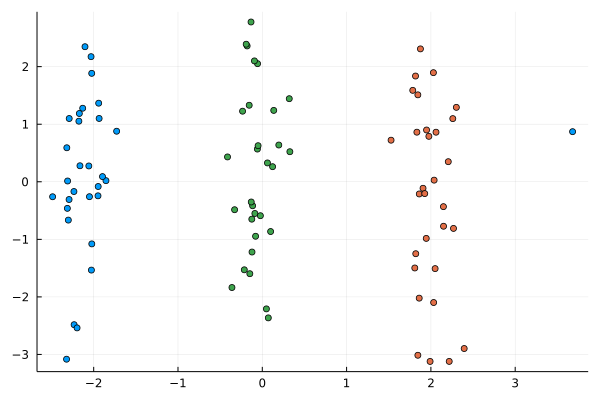

In [211]:

x,y = norm_mag_eig_maps(W,g)

# plotting the groups in different color
plot(x[G1],y[G1], seriestype=:scatter,legend=false)
plot!(x[G2],y[G2], seriestype=:scatter,legend=false)
plot!(x[G3],y[G3], seriestype=:scatter,legend=false)